In [128]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import re
from wordcloud import WordCloud
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv('../../repo/maestras/data/maestras.csv', index_col=0)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Artist                74 non-null     object
 1   Bio                   74 non-null     object
 2   Birth Year            74 non-null     int64 
 3   Death Year            74 non-null     int64 
 4   From Artists Family   74 non-null     bool  
 5   Early Talent          74 non-null     bool  
 6   Academy               74 non-null     bool  
 7   Formed Other Artists  74 non-null     bool  
 8   Equality Activist     74 non-null     bool  
 9   Traveler              74 non-null     bool  
 10  Prolific              74 non-null     bool  
 11  Writings              74 non-null     bool  
 12  Own Museum            74 non-null     bool  
 13  Score                 74 non-null     int64 
 14  Century               74 non-null     int64 
dtypes: bool(9), int64(4), object(2)
memory usa

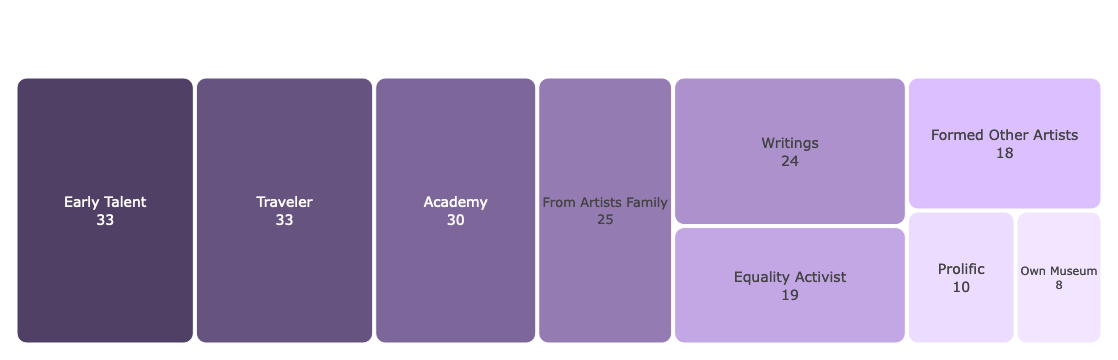

In [93]:
bool_columns = df.select_dtypes(include=bool)
true_counts = bool_columns.sum()
true_counts_df = true_counts.reset_index()
true_counts_df.columns = ['column', 'true_count']

fig = px.treemap(true_counts_df, 
                 path=['column'], 
                 values='true_count',
                 labels={'true_count': 'count'},
                 title='')

fig.update_layout(margin=dict(t=50, l=10, r=10, b=10),
                 treemapcolorway = ["#514066", "#675380", "#7D6699", "#947BB2", "#AC91CC", "#C3A7E5", "#DCBFFF", "#ECDCFF", "#F1E5FF"])

fig.update_traces(marker=dict(cornerradius=10), 
                  textinfo='label+value', 
                  textfont_size=14,
                  textposition='middle center')
fig.show()

In [94]:
df_sorted = df.sort_values(by='Score', ascending=False).head(10)
df_sorted

,Artist,Bio,Birth Year,Death Year,From Artists Family,Early Talent,Academy,Formed Other Artists,Equality Activist,Traveler,Prolific,Writings,Own Museum,Score,Century
26,Artemisia Gentileschi,https://en.wikipedia.org/wiki/Artemisia_Gentil...,1593,1656,True,True,True,True,True,True,False,True,False,7,17
71,Louise-Élisabeth Vigée-Le Brun,https://en.wikipedia.org/wiki/%C3%89lisabeth_V...,1755,1842,True,True,True,True,False,True,True,True,False,7,18
33,Angelica Kauffmann,https://en.wikipedia.org/wiki/Angelica_Kauffman,1741,1807,True,True,True,False,False,True,True,False,True,6,18
7,Rosa Bonheur,https://en.wikipedia.org/wiki/Rosa_Bonheur,1822,1899,True,True,True,True,True,False,False,False,True,6,19
65,Elisabetta Sirani,https://en.wikipedia.org/wiki/Elisabetta_Sirani,1638,1665,True,True,True,True,True,False,True,False,False,6,17
21,Lavinia Fontana,https://en.wikipedia.org/wiki/Lavinia_Fontana,1552,1614,True,True,True,True,False,False,True,True,False,6,16
34,Käthe Kollwitz,https://en.wikipedia.org/wiki/K%C3%A4the_Kollwitz,1867,1945,False,True,True,True,True,False,False,False,True,5,19
70,Lluïsa Vidal,https://en.wikipedia.org/wiki/Llu%C3%AFsa_Vidal,1876,1918,True,True,False,True,True,True,False,False,False,5,19
62,Anna Maria van Schurman,https://en.wikipedia.org/wiki/Anna_Maria_van_S...,1607,1678,False,True,True,False,True,False,False,True,True,5,17
13,Mary Cassatt,https://en.wikipedia.org/wiki/Mary_Cassatt,1844,1926,False,True,False,False,True,True,True,True,False,5,19


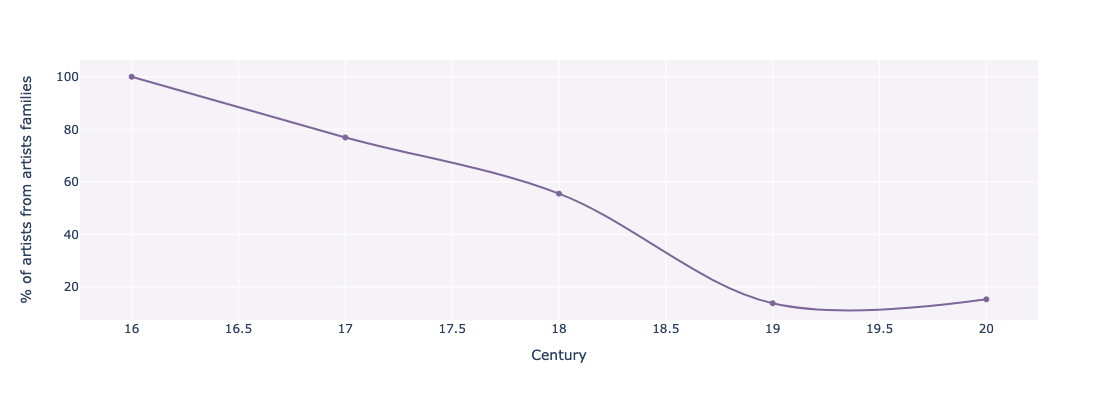

In [95]:
artists_fam_per_century = df.groupby('Century')['From Artists Family'].sum().reset_index()


total_per_century = df['Century'].value_counts().reset_index()
total_per_century.columns = ['Century', 'Total Artists']


artists_fam_time = pd.merge(artists_fam_per_century, total_per_century, on='Century')


artists_fam_time['Percentage'] = (artists_fam_time['From Artists Family'] / artists_fam_time['Total Artists']) * 100


fig = px.line(artists_fam_time, 
              x='Century', 
              y='Percentage',
              labels={'Percentage': '% of artists from artists families', 'Century': 'Century'},
              title='',
              line_shape='spline',
              width=800,
              height=400,
              markers=True)

fig.update_traces(line=dict(color='#7D6699'), selector=dict(type='scatter'))
fig.update_layout(plot_bgcolor='rgba(125,102,153,0.08)')

fig.show()


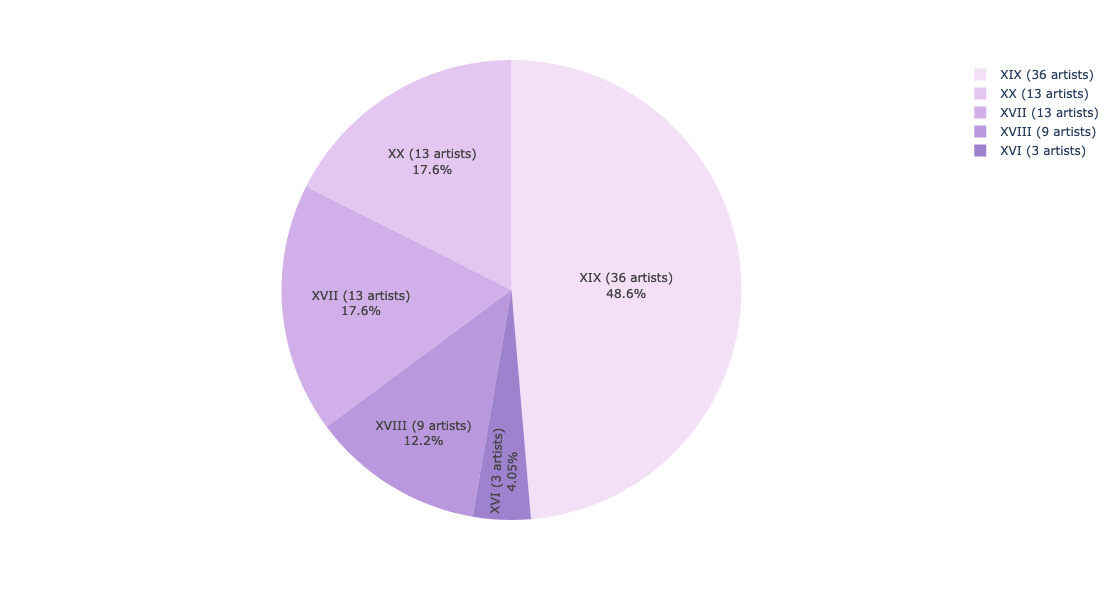

In [96]:
century_counts = df['Century'].value_counts()

century_labels = {"16": "XVI", "17": "XVII", "18": "XVIII", "19": "XIX", "20": "XX"}

labels = [f"{century_labels[str(century)]} ({count} artists)" for century, count in zip(century_counts.index, century_counts.values)]

fig = px.pie(century_counts, 
             values=century_counts.values, 
             names=labels,  
             title='',
             height=600, 
             width=800,
             color_discrete_sequence=px.colors.sequential.Purp) 

fig.update_traces(textinfo='label + percent', 
                  textfont_size=12,
                  textposition='inside')

fig.show()
